# Learning Rate Schedule & Adaptive Gradient Descent Algorithm

* A CNN model is constructed to train on CIFAR-10

* The following learning rate decay schedules are used : constant learning rate, time-based decay, step decay, exponential decay

* The following adaptive graident descent algorithms are used : Adagrad, Adadelta, RMSProp, Adam
    
* Model performance of using different learning rate schedules or adaptive gradient descent algorithms are compared

In [1]:
from __future__ import print_function
import numpy as np
import math

import matplotlib.pyplot as plt
%matplotlib inline  

import keras
from keras import backend as K
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam
from keras.callbacks import LearningRateScheduler

Using TensorFlow backend.


# Load CIFAR-10 data

In [2]:
batch_size = 64
num_classes = 2
epochs = 100

# input image dimensions
img_rows, img_cols = 32, 32   

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()   

# Only look at cats [=3] and dogs [=5]
train_picks = np.ravel(np.logical_or(y_train==3,y_train==5))  
test_picks = np.ravel(np.logical_or(y_test==3,y_test==5))     

y_train = np.array(y_train[train_picks]==5,dtype=int)
y_test = np.array(y_test[test_picks]==5,dtype=int)

X_train = X_train[train_picks]
X_test = X_test[test_picks]

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 3, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(np.ravel(y_train), num_classes)
y_test = keras.utils.to_categorical(np.ravel(y_test), num_classes)

X_train shape: (10000, 32, 32, 3)
10000 train samples
2000 test samples


# Define function to construct CNN model

In [3]:
def cnn_model() : 
    model = Sequential()
    model.add(Conv2D(4, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
    model.add(Conv2D(8, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    # print(model.summary())
    return(model)

# Define function to plot model accuracy

In [4]:
def plot_fig(i, history):
    fig = plt.figure()
    plt.plot(range(1,epochs+1),history.history['val_acc'],label='validation')
    plt.plot(range(1,epochs+1),history.history['acc'],label='training')
    plt.legend(loc=0)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.xlim([1,epochs])
#     plt.ylim([0,1])
    plt.grid(True)
    plt.title("Model Accuracy")
    plt.show()
    fig.savefig('img/'+str(i)+'-accuracy.jpg')
    plt.close(fig)

# Constant learning rate

Train on 10000 samples, validate on 2000 samples
Epoch 1/100
6s - loss: 0.6925 - acc: 0.5189 - val_loss: 0.6895 - val_acc: 0.5515
Epoch 2/100
6s - loss: 0.6804 - acc: 0.5598 - val_loss: 0.6633 - val_acc: 0.5860
Epoch 3/100
6s - loss: 0.6716 - acc: 0.5827 - val_loss: 0.6726 - val_acc: 0.5515
Epoch 4/100
6s - loss: 0.6611 - acc: 0.5958 - val_loss: 0.6546 - val_acc: 0.6120
Epoch 5/100
6s - loss: 0.6514 - acc: 0.6132 - val_loss: 0.6363 - val_acc: 0.6285
Epoch 6/100
6s - loss: 0.6475 - acc: 0.6195 - val_loss: 0.6672 - val_acc: 0.5945
Epoch 7/100
6s - loss: 0.6413 - acc: 0.6292 - val_loss: 0.6639 - val_acc: 0.6060
Epoch 8/100
5s - loss: 0.6349 - acc: 0.6362 - val_loss: 0.6208 - val_acc: 0.6535
Epoch 9/100
5s - loss: 0.6240 - acc: 0.6485 - val_loss: 0.6479 - val_acc: 0.6185
Epoch 10/100
5s - loss: 0.6188 - acc: 0.6508 - val_loss: 0.6206 - val_acc: 0.6490
Epoch 11/100
5s - loss: 0.6111 - acc: 0.6596 - val_loss: 0.6113 - val_acc: 0.6600
Epoch 12/100
5s - loss: 0.6147 - acc: 0.6559 - val_loss: 0

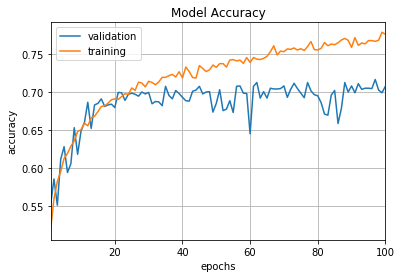

In [5]:
# define CNN model
model1 = cnn_model()

# define SGD optimizer
learning_rate = 0.1
sgd = SGD(lr=learning_rate, momentum=0.0, decay=0.0, nesterov=False) # set to default except lr

# compile the model
model1.compile(loss=keras.losses.categorical_crossentropy, optimizer=sgd, metrics=['accuracy'])

# fit the model
history1 = model1.fit(X_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                verbose=2,
                validation_data=(X_test, y_test))

# plot model accuracy
plot_fig(1, history1)

# Time-based decay

Train on 10000 samples, validate on 2000 samples
Epoch 1/100
6s - loss: 0.6942 - acc: 0.5143 - val_loss: 0.6815 - val_acc: 0.5940
Epoch 2/100
5s - loss: 0.6808 - acc: 0.5632 - val_loss: 0.6656 - val_acc: 0.5855
Epoch 3/100
5s - loss: 0.6682 - acc: 0.5891 - val_loss: 0.6620 - val_acc: 0.6250
Epoch 4/100
5s - loss: 0.6522 - acc: 0.6148 - val_loss: 0.6531 - val_acc: 0.6110
Epoch 5/100
6s - loss: 0.6434 - acc: 0.6262 - val_loss: 0.6336 - val_acc: 0.6335
Epoch 6/100
5s - loss: 0.6369 - acc: 0.6320 - val_loss: 0.6343 - val_acc: 0.6250
Epoch 7/100
5s - loss: 0.6324 - acc: 0.6388 - val_loss: 0.6282 - val_acc: 0.6430
Epoch 8/100
5s - loss: 0.6299 - acc: 0.6442 - val_loss: 0.6220 - val_acc: 0.6480
Epoch 9/100
5s - loss: 0.6268 - acc: 0.6418 - val_loss: 0.6231 - val_acc: 0.6520
Epoch 10/100
5s - loss: 0.6245 - acc: 0.6425 - val_loss: 0.6208 - val_acc: 0.6460
Epoch 11/100
5s - loss: 0.6170 - acc: 0.6510 - val_loss: 0.6163 - val_acc: 0.6590
Epoch 12/100
5s - loss: 0.6172 - acc: 0.6578 - val_loss: 0

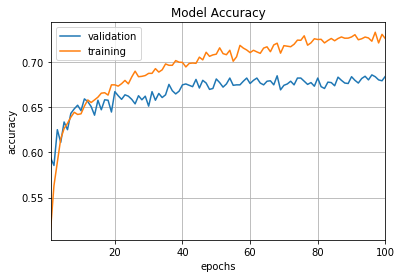

In [6]:
# define CNN model
model2 = cnn_model()

# define SGD optimizer
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.5
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

# compile the model
model2.compile(loss=keras.losses.categorical_crossentropy, optimizer=sgd, metrics=['accuracy'])

# fit the model
history2 = model2.fit(X_train, y_train, 
                     epochs=epochs, 
                     batch_size=batch_size,
                     verbose=2, 
                     validation_data=(X_test, y_test))

# plot model accuracy
plot_fig(2, history2)

# Step decay

Train on 10000 samples, validate on 2000 samples
Epoch 1/100
lr: 0.1
6s - loss: 0.6940 - acc: 0.5277 - val_loss: 0.6770 - val_acc: 0.5395
Epoch 2/100
lr: 0.1
6s - loss: 0.6747 - acc: 0.5810 - val_loss: 0.6591 - val_acc: 0.6055
Epoch 3/100
lr: 0.1
6s - loss: 0.6563 - acc: 0.6086 - val_loss: 0.6517 - val_acc: 0.6110
Epoch 4/100
lr: 0.1
6s - loss: 0.6476 - acc: 0.6233 - val_loss: 0.6590 - val_acc: 0.5945
Epoch 5/100
lr: 0.1
6s - loss: 0.6418 - acc: 0.6322 - val_loss: 0.6397 - val_acc: 0.6240
Epoch 6/100
lr: 0.1
6s - loss: 0.6427 - acc: 0.6318 - val_loss: 0.6373 - val_acc: 0.6350
Epoch 7/100
lr: 0.1
6s - loss: 0.6382 - acc: 0.6381 - val_loss: 0.6386 - val_acc: 0.6365
Epoch 8/100
lr: 0.1
6s - loss: 0.6313 - acc: 0.6413 - val_loss: 0.6481 - val_acc: 0.6215
Epoch 9/100
lr: 0.1
6s - loss: 0.6275 - acc: 0.6470 - val_loss: 0.6242 - val_acc: 0.6600
Epoch 10/100
lr: 0.05
6s - loss: 0.6197 - acc: 0.6537 - val_loss: 0.6219 - val_acc: 0.6540
Epoch 11/100
lr: 0.05
6s - loss: 0.6062 - acc: 0.6691 - val

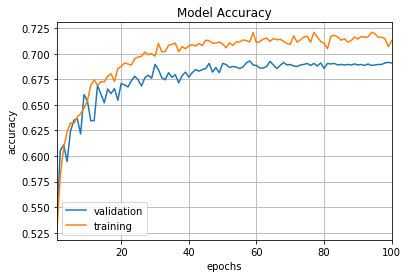

In [7]:
# define CNN model
model3 = cnn_model()

# define SGD optimizer
momentum = 0.5
sgd = SGD(lr=0.0, momentum=momentum, decay=0.0, nesterov=False) 

# compile the model
model3.compile(loss=keras.losses.categorical_crossentropy,optimizer=sgd, metrics=['accuracy'])

# define step decay function
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.lr = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.lr.append(step_decay(len(self.losses)))
        print('lr:', step_decay(len(self.losses)))

def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop, math.floor((epoch)/epochs_drop))
    return lrate

# learning schedule callback
loss_history = LossHistory()
lrate = LearningRateScheduler(step_decay)
callbacks_list = [loss_history, lrate]

# fit the model
history3 = model3.fit(X_train, y_train, 
                     validation_data=(X_test, y_test), 
                     epochs=epochs, 
                     batch_size=batch_size, 
                     callbacks=callbacks_list, 
                     verbose=2)

# plot model accuracy
plot_fig(3, history3)

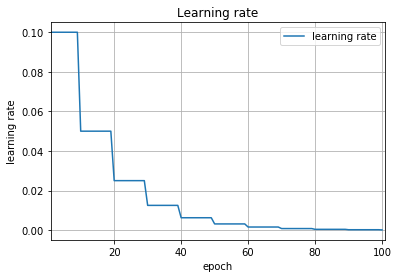

In [8]:
# plot learning rate
fig = plt.figure()
plt.plot(range(1,epochs+1),loss_history.lr,label='learning rate')
plt.xlabel("epoch")
plt.xlim([1,epochs+1])
plt.ylabel("learning rate")
plt.legend(loc=0)
plt.grid(True)
plt.title("Learning rate")
plt.show()
fig.savefig('img/3-learning-rate.jpg')
plt.close(fig)

# Exponential decay

Train on 10000 samples, validate on 2000 samples
Epoch 1/100
lr: 0.0606530659713
6s - loss: 0.6942 - acc: 0.4946 - val_loss: 0.6933 - val_acc: 0.5000
Epoch 2/100
lr: 0.0367879441171
6s - loss: 0.6936 - acc: 0.4947 - val_loss: 0.6930 - val_acc: 0.4995
Epoch 3/100
lr: 0.0223130160148
7s - loss: 0.6932 - acc: 0.4991 - val_loss: 0.6929 - val_acc: 0.5050
Epoch 4/100
lr: 0.0135335283237
6s - loss: 0.6930 - acc: 0.5028 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 5/100
lr: 0.00820849986239
7s - loss: 0.6931 - acc: 0.5047 - val_loss: 0.6929 - val_acc: 0.5275
Epoch 6/100
lr: 0.00497870683679
6s - loss: 0.6929 - acc: 0.5201 - val_loss: 0.6927 - val_acc: 0.5395
Epoch 7/100
lr: 0.00301973834223
6s - loss: 0.6929 - acc: 0.5118 - val_loss: 0.6926 - val_acc: 0.5430
Epoch 8/100
lr: 0.00183156388887
7s - loss: 0.6928 - acc: 0.5051 - val_loss: 0.6926 - val_acc: 0.5380
Epoch 9/100
lr: 0.00111089965382
6s - loss: 0.6927 - acc: 0.5186 - val_loss: 0.6926 - val_acc: 0.5440
Epoch 10/100
lr: 0.000673794699909
6s

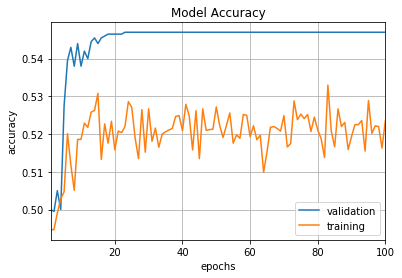

In [9]:
# define CNN model
model4 = cnn_model()

# define SGD optimizer
momentumn = 0.8
sgd = SGD(lr=0.0, momentum=momentum, decay=0.0, nesterov=False)

# compile the model
model4.compile(loss=keras.losses.categorical_crossentropy, optimizer=sgd, metrics=['accuracy'])

# define step decay function
class LossHistory_(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.lr = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.lr.append(exp_decay(len(self.losses)))
        print('lr:', exp_decay(len(self.losses)))

def exp_decay(epoch):
    initial_lrate = 0.1
    k = 0.5
    lrate = initial_lrate * np.exp(-k*epoch)
    return lrate

# learning schedule callback
loss_history_ = LossHistory_()
lrate_ = LearningRateScheduler(exp_decay)
callbacks_list_ = [loss_history_, lrate_]

# fit the model
history4 = model4.fit(X_train, y_train, 
                     validation_data=(X_test, y_test), 
                     epochs=epochs, 
                     batch_size=batch_size, 
                     callbacks=callbacks_list_, 
                     verbose=2)

# plot model accuracy
plot_fig(4, history4)

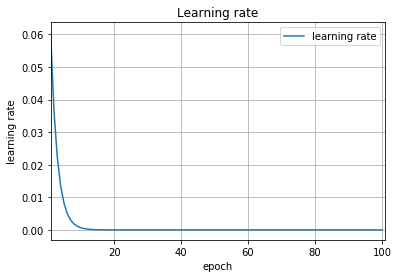

In [10]:
# plot learning rate
fig = plt.figure()
plt.plot(range(1,epochs+1),loss_history_.lr,label='learning rate')
plt.xlabel("epoch")
plt.xlim([1,epochs+1])
plt.ylabel("learning rate")
plt.legend(loc=0)
plt.grid(True)
plt.title("Learning rate")
plt.show()
fig.savefig('img/4-learning-rate.jpg')
plt.close(fig)

# Adaptive gradient descent algorithms : Adagrad, Adadelta, RMSprop, Adam

In [11]:
# fit CNN model using Adagrad optimizer
model5 = cnn_model()
model5.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adagrad(lr=0.01, epsilon=1e-08, decay=0.0),
              metrics=['accuracy'])
history5 = model5.fit(X_train, y_train, 
                     validation_data=(X_test, y_test), 
                     epochs=epochs, 
                     batch_size=batch_size,
                     verbose=2)

# fit CNN model using Adadelta optimizer
model6 = cnn_model()
model6.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adadelta(lr=1.0, rho=0.95, epsilon=1e-08, decay=0.0),
              metrics=['accuracy'])
history6 = model6.fit(X_train, y_train, 
                     validation_data=(X_test, y_test), 
                     epochs=epochs, 
                     batch_size=batch_size,
                     verbose=2)

# fit CNN model using RMSprop optimizer
model7 = cnn_model()
model7.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0),
              metrics=['accuracy'])
history7 = model7.fit(X_train, y_train, 
                     validation_data=(X_test, y_test), 
                     epochs=epochs, 
                     batch_size=batch_size,
                     verbose=2)

# fit CNN model using Adam optimizer
model8 = cnn_model()
model8.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0),
              metrics=['accuracy'])
history8 = model8.fit(X_train, y_train, 
                     validation_data=(X_test, y_test), 
                     epochs=epochs, 
                     batch_size=batch_size,
                     verbose=2)

Train on 10000 samples, validate on 2000 samples
Epoch 1/100
7s - loss: 0.6962 - acc: 0.5416 - val_loss: 0.6760 - val_acc: 0.6050
Epoch 2/100
6s - loss: 0.6740 - acc: 0.5704 - val_loss: 0.6642 - val_acc: 0.6135
Epoch 3/100
6s - loss: 0.6627 - acc: 0.5993 - val_loss: 0.6552 - val_acc: 0.6195
Epoch 4/100
6s - loss: 0.6564 - acc: 0.6152 - val_loss: 0.6515 - val_acc: 0.6240
Epoch 5/100
6s - loss: 0.6503 - acc: 0.6177 - val_loss: 0.6417 - val_acc: 0.6310
Epoch 6/100
6s - loss: 0.6399 - acc: 0.6380 - val_loss: 0.6342 - val_acc: 0.6270
Epoch 7/100
7s - loss: 0.6358 - acc: 0.6419 - val_loss: 0.6279 - val_acc: 0.6375
Epoch 8/100
6s - loss: 0.6332 - acc: 0.6437 - val_loss: 0.6271 - val_acc: 0.6385
Epoch 9/100
6s - loss: 0.6273 - acc: 0.6542 - val_loss: 0.6267 - val_acc: 0.6405
Epoch 10/100
7s - loss: 0.6206 - acc: 0.6548 - val_loss: 0.6322 - val_acc: 0.6255
Epoch 11/100
7s - loss: 0.6178 - acc: 0.6558 - val_loss: 0.6139 - val_acc: 0.6560
Epoch 12/100
6s - loss: 0.6142 - acc: 0.6639 - val_loss: 0

# Compare model accuracy

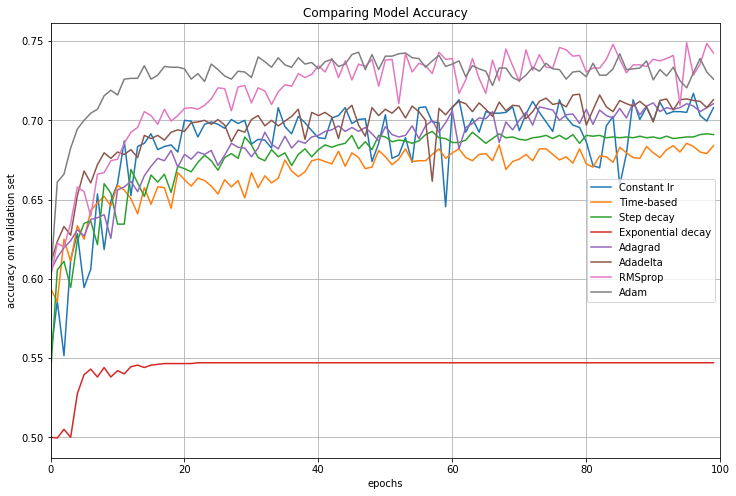

In [12]:
fig = plt.figure(figsize=(12,8))
plt.plot(range(epochs),history1.history['val_acc'],label='Constant lr')
plt.plot(range(epochs),history2.history['val_acc'],label='Time-based')
plt.plot(range(epochs),history3.history['val_acc'],label='Step decay')
plt.plot(range(epochs),history4.history['val_acc'],label='Exponential decay')
plt.plot(range(epochs),history5.history['val_acc'],label='Adagrad')
plt.plot(range(epochs),history6.history['val_acc'],label='Adadelta')
plt.plot(range(epochs),history7.history['val_acc'],label='RMSprop')
plt.plot(range(epochs),history8.history['val_acc'],label='Adam')
plt.legend(loc=0)
plt.xlabel('epochs')
plt.xlim([0,epochs])
plt.ylabel('accuracy om validation set')
plt.grid(True)
plt.title("Comparing Model Accuracy")
plt.show()
fig.savefig('img/compare-accuracy.jpg')
plt.close(fig)